# 1. Предобработка

Загружаем данные по покупками клиентов сети баров (файл "Обезличенные_данные_09_2019.xlsx") 
и файл "Справочник_блюд.xlsx" для присвоения категорий (групп) покупкам.

## Цель предобработки: получить дата-фрейм, в котором каждому клиенту соответствует одна строчка с информацией по столбцам.

* Проверяем наличие пропусков. В данных по покупкам есть строки с пропущенным значением "Пол", их удаляем.

* Дату переводим в нужный формат.

* Чтобы задать идентификатор каждого посещения бара, создаем колонку "Телефон и дата и бар" (это строковая сумма номера телефона (ID клиента), даты, номера бара).

* Объединяем данные по покупкам со Справочником блюд для присвоения блюдам категорий.

* Создаём дамми-переменные для дней недели (1-понедельник, 7- воскресенье).

* Методом группировки для каждого телеф.номера находим кол-во уникальных визитов (для этого используем созданную ранее колонку "Телефон и дата и бар") и общую сумму оплат за месяц (ARPU клиента).

* Добавляем к основному файлу эту информацию.

* Создаем колонки, соответствующие укрупненным категориям блюд, и проставляем количество заказанных блюд клиентом. С помощью группировки получаем таблицу, где по каждому клиенту вся информация в одной строчке.

* Добавляем дамми-переменные о дне недели, удаляем номер телефона (ID клиента), преобразуем "Пол" в бинарный тип (М-1, Ж-0).

* Готовый дата-фрейм экспортируем в файл "Data_Sept2019.xlsx".

* Визуализируем и интерпретируем существенные данные.

In [1]:
import pandas as pd
import time
from datetime import datetime
import re

In [2]:
data0=pd.read_excel('Обезличенные_данные_09_2019.xlsx')
Sprav=pd.read_excel('Справочник блюд.xlsx')

In [3]:
Sprav.head()

,Название товара,Группа,Группа укруп,Гр
0,STAFF РАФ кокосовый,Горячие напитки,Горячие напитки,Бар
1,3* Бифитер Пинк Тоник,Коктейли для друзей,Коктейли для друзей,Бар
2,3* Гордонс Пинк Лимонад,Коктейли для друзей,Коктейли для друзей,Бар
3,3*Бэллс Оридж. 40мл,Алк Сеты,Сеты,Бар
4,3*Капитан Кола,Алк Сеты,Сеты,Бар


In [4]:
Sprav.isnull().sum()

Название товара    0
Группа             0
Группа укруп       0
Гр                 0
dtype: int64

In [5]:
data0.head()

,Телефон,Пол,Дата покупки,Название товара,Количество,Бар,Оплачено
0,0,M,2019-09-08,3*Зеленая фея,1.0,3,657.0
1,1,M,2019-09-05,Графин Науки,1.0,1,279.0
2,1,M,2019-09-05,Вызов судьбы!,1.0,1,0.0
3,1,M,2019-09-05,Мишка под радугой,1.0,1,309.0
4,1,M,2019-09-05,Зеленая фея,2.0,1,550.0


In [6]:
data0.shape

(138051, 7)

In [7]:
data0.isna().sum()

Телефон               0
Пол                4532
Дата покупки          0
Название товара       0
Количество            0
Бар                   0
Оплачено              0
dtype: int64

In [8]:
data0.columns

Index(['Телефон', 'Пол', 'Дата покупки', 'Название товара', 'Количество',
       'Бар', 'Оплачено'],
      dtype='object')

In [9]:
data0.dropna(subset=['Пол'],inplace=True)

In [10]:
data0['Дата покупки2']=data0['Дата покупки'].apply(lambda x: x.strftime( '%Y-%m-%d' ) if not(pd.isnull(x)) else x)

In [11]:
def Pokupka(row):
    return str(row['Телефон'])+str(row['Дата покупки2'])+str(row['Бар'])

In [12]:
data0['Тел и Дата и Бар']=data0.apply(Pokupka, axis=1)
data0.head()

,Телефон,Пол,Дата покупки,Название товара,Количество,Бар,Оплачено,Дата покупки2,Тел и Дата и Бар
0,0,M,2019-09-08,3*Зеленая фея,1.0,3,657.0,2019-09-08,02019-09-083
1,1,M,2019-09-05,Графин Науки,1.0,1,279.0,2019-09-05,12019-09-051
2,1,M,2019-09-05,Вызов судьбы!,1.0,1,0.0,2019-09-05,12019-09-051
3,1,M,2019-09-05,Мишка под радугой,1.0,1,309.0,2019-09-05,12019-09-051
4,1,M,2019-09-05,Зеленая фея,2.0,1,550.0,2019-09-05,12019-09-051


In [13]:
data0=data0.merge(Sprav, on='Название товара', how='left')
data0.tail()

,Телефон,Пол,Дата покупки,Название товара,Количество,Бар,Оплачено,Дата покупки2,Тел и Дата и Бар,Группа,Группа укруп,Гр
133514,16156,Ж,2019-09-30,Скибиди Упа-па-па,2.0,5,418.0,2019-09-30,161562019-09-305,Сеты,Сеты,Бар
133515,16156,Ж,2019-09-30,Вызов судьбы!,2.0,5,0.0,2019-09-30,161562019-09-305,Акция Кости судьбы,Акции,Бар
133516,16156,Ж,2019-09-30,3*Зомби,1.0,5,537.0,2019-09-30,161562019-09-305,Коктейли для друзей,Коктейли для друзей,Бар
133517,16156,Ж,2019-09-30,Московская красавица,2.0,5,318.0,2019-09-30,161562019-09-305,Лонги,Лонги,Бар
133518,16156,Ж,2019-09-30,Малина 404,2.0,5,358.0,2019-09-30,161562019-09-305,Лонги,Лонги,Бар


In [14]:
data0.columns

Index(['Телефон', 'Пол', 'Дата покупки', 'Название товара', 'Количество',
       'Бар', 'Оплачено', 'Дата покупки2', 'Тел и Дата и Бар', 'Группа',
       'Группа укруп', 'Гр'],
      dtype='object')

In [15]:
days=data0['Дата покупки2'].reset_index()
days['День недели']=days['Дата покупки2'].apply(lambda x: 1+(pd.to_datetime(x).dayofweek))
days.tail()

,index,Дата покупки2,День недели
133514,133514,2019-09-30,1
133515,133515,2019-09-30,1
133516,133516,2019-09-30,1
133517,133517,2019-09-30,1
133518,133518,2019-09-30,1


In [16]:
dow=pd.get_dummies(days['День недели'])
dow.columns=['1','2','3','4','5','6','7']
dow

,1,2,3,4,5,6,7
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
133514,1,0,0,0,0,0,0
133515,1,0,0,0,0,0,0
133516,1,0,0,0,0,0,0
133517,1,0,0,0,0,0,0


In [17]:
Tabl1=data0.groupby(['Телефон', 'Тел и Дата и Бар'])['Оплачено'].sum().reset_index()
Tabl1.tail()

,Телефон,Тел и Дата и Бар,Оплачено
22298,16152,161522019-09-123,1373.0
22299,16153,161532019-09-183,1702.0
22300,16154,161542019-09-305,1273.0
22301,16155,161552019-09-046,189.0
22302,16156,161562019-09-305,3075.0


In [18]:
Tabl2=Tabl1.groupby(['Телефон'])['Оплачено'].sum().reset_index()
Tabl2.tail()

,Телефон,Оплачено
15572,16152,1373.0
15573,16153,1702.0
15574,16154,1273.0
15575,16155,189.0
15576,16156,3075.0


In [19]:
Tabl3=Tabl1.groupby(['Телефон'])['Оплачено'].count().reset_index()
Tabl3.tail()

,Телефон,Оплачено
15572,16152,1
15573,16153,1
15574,16154,1
15575,16155,1
15576,16156,1


In [20]:
Svod1=Tabl2.merge(Tabl3, on='Телефон', how='inner')
Svod1.columns=['Телефон', 'ARPU','Посещений']
Svod1.tail()

,Телефон,ARPU,Посещений
15572,16152,1373.0,1
15573,16153,1702.0,1
15574,16154,1273.0,1
15575,16155,189.0,1
15576,16156,3075.0,1


In [21]:
data0=data0.merge(Svod1, on='Телефон', how='inner')
data0=pd.concat([data0, dow], axis=1)
data0.tail()

,Телефон,Пол,Дата покупки,Название товара,Количество,Бар,Оплачено,Дата покупки2,Тел и Дата и Бар,Группа,...,Гр,ARPU,Посещений,1,2,3,4,5,6,7
133514,16156,Ж,2019-09-30,Скибиди Упа-па-па,2.0,5,418.0,2019-09-30,161562019-09-305,Сеты,...,Бар,3075.0,1,1,0,0,0,0,0,0
133515,16156,Ж,2019-09-30,Вызов судьбы!,2.0,5,0.0,2019-09-30,161562019-09-305,Акция Кости судьбы,...,Бар,3075.0,1,1,0,0,0,0,0,0
133516,16156,Ж,2019-09-30,3*Зомби,1.0,5,537.0,2019-09-30,161562019-09-305,Коктейли для друзей,...,Бар,3075.0,1,1,0,0,0,0,0,0
133517,16156,Ж,2019-09-30,Московская красавица,2.0,5,318.0,2019-09-30,161562019-09-305,Лонги,...,Бар,3075.0,1,1,0,0,0,0,0,0
133518,16156,Ж,2019-09-30,Малина 404,2.0,5,358.0,2019-09-30,161562019-09-305,Лонги,...,Бар,3075.0,1,1,0,0,0,0,0,0


In [22]:
Tabl_day=data0.groupby(['Телефон', 'Тел и Дата и Бар'])['1','2','3','4','5','6','7'].mean().reset_index()
Tabl_day.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Телефон,Тел и Дата и Бар,1,2,3,4,5,6,7
22298,16152,161522019-09-123,0,0,0,1,0,0,0
22299,16153,161532019-09-183,0,0,1,0,0,0,0
22300,16154,161542019-09-305,1,0,0,0,0,0,0
22301,16155,161552019-09-046,0,0,1,0,0,0,0
22302,16156,161562019-09-305,1,0,0,0,0,0,0


In [23]:
Tabl_day2=Tabl_day.groupby(['Телефон'])['1','2','3','4','5','6','7'].sum().reset_index()
Tabl_day2.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Телефон,1,2,3,4,5,6,7
15572,16152,0,0,0,1,0,0,0
15573,16153,0,0,1,0,0,0,0
15574,16154,1,0,0,0,0,0,0
15575,16155,0,0,1,0,0,0,0
15576,16156,1,0,0,0,0,0,0


In [24]:
#Формируем краткий файл на основе data0
df=data0.groupby(['Телефон', 'Пол', 'ARPU','Посещений', 'Группа укруп'])['Количество'].sum().reset_index()
df.tail()

,Телефон,Пол,ARPU,Посещений,Группа укруп,Количество
74441,16156,Ж,3075.0,1,Лонги,6.0
74442,16156,Ж,3075.0,1,Напитки TO GO,2.0
74443,16156,Ж,3075.0,1,Пицца,1.0
74444,16156,Ж,3075.0,1,Сеты,2.0
74445,16156,Ж,3075.0,1,"Соусы, хлеб",1.0


In [25]:
Group_Global=df['Группа укруп'].unique()
Group_Global

array(['Коктейли для друзей', 'Акции', 'Лонги', 'Пиво для друзей',
       'Пиво до 1л', 'Сеты', 'Наборы на компанию', 'Горячие блюда',
       'Горячие напитки', 'Кальяны', 'Снэки', 'Соусы, хлеб',
       'Холодные напитки', 'Крепкий алкоголь', 'Роллы', 'Пицца', 'Супы',
       'Стритфуд', 'Десерты', 'Салаты', 'Вино 125 мл', 'Вино', 'Прочее',
       'Напитки TO GO', 'Бизнес-ланч'], dtype=object)

In [26]:
def find_cuis(cell):
    if re.search(pattern, cell['Группа укруп']):
        return cell['Количество']
    else:
        return 0

In [27]:
for pattern in Group_Global:
    df[pattern]=df.apply(find_cuis, axis = 1)

In [28]:
df.tail()

,Телефон,Пол,ARPU,Посещений,Группа укруп,Количество,Коктейли для друзей,Акции,Лонги,Пиво для друзей,...,Пицца,Супы,Стритфуд,Десерты,Салаты,Вино 125 мл,Вино,Прочее,Напитки TO GO,Бизнес-ланч
74441,16156,Ж,3075.0,1,Лонги,6.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74442,16156,Ж,3075.0,1,Напитки TO GO,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
74443,16156,Ж,3075.0,1,Пицца,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74444,16156,Ж,3075.0,1,Сеты,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74445,16156,Ж,3075.0,1,"Соусы, хлеб",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df2=df.groupby(['Телефон', 'Пол', 'ARPU','Посещений'])[Group_Global].sum().reset_index()
df2.tail()

,Телефон,Пол,ARPU,Посещений,Коктейли для друзей,Акции,Лонги,Пиво для друзей,Пиво до 1л,Сеты,...,Пицца,Супы,Стритфуд,Десерты,Салаты,Вино 125 мл,Вино,Прочее,Напитки TO GO,Бизнес-ланч
15572,16152,Ж,1373.0,1,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
15573,16153,M,1702.0,1,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
15574,16154,Ж,1273.0,1,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15575,16155,M,189.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15576,16156,Ж,3075.0,1,1.0,3.0,6.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [30]:
data0['Телефон'].nunique()==len(df2)

True

In [31]:
len(Tabl_day2)==len(df2)

True

In [32]:
df2=df2.merge(Tabl_day2, on='Телефон', how='inner')
df2.tail()

,Телефон,Пол,ARPU,Посещений,Коктейли для друзей,Акции,Лонги,Пиво для друзей,Пиво до 1л,Сеты,...,Прочее,Напитки TO GO,Бизнес-ланч,1,2,3,4,5,6,7
15572,16152,Ж,1373.0,1,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
15573,16153,M,1702.0,1,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,0,0,1,0,0,0,0
15574,16154,Ж,1273.0,1,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
15575,16155,M,189.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
15576,16156,Ж,3075.0,1,1.0,3.0,6.0,0.0,0.0,2.0,...,0.0,2.0,0.0,1,0,0,0,0,0,0


In [33]:
df3 = df2.drop('Телефон', axis='columns')
df3['Пол'] = (df3['Пол']!='Ж').astype('int32')

In [34]:
with pd.ExcelWriter('Data_Sept2019.xlsx') as writer:  # doctest: +SKIP
    df3.to_excel(writer, sheet_name='data', index=False)

## Визулизация данных

* Видим, что девушек среди посетителей несколько меньше, чем парней (7561 против 8016).
* Больше всего клиентов посещают бар 1 раз за текущий месяц, далее с большим отрывом следуют 2, 3  посещения в месяц.
* Построено 2 гистограммы по доходности клиентов (ARPU): общая и более подробная для ARPU < 8000 руб (с шагом 500р): предварительно видим, что больше всего клиентов тратят за месяц сумму в диапазоне 500-2000 руб. При этом точное медианное значение составляет 1889 руб.
* Диаграммы рассеяния показывает, что высокое ARPU может быть при разном количестве посещений: начиная от 1 посещения. 


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

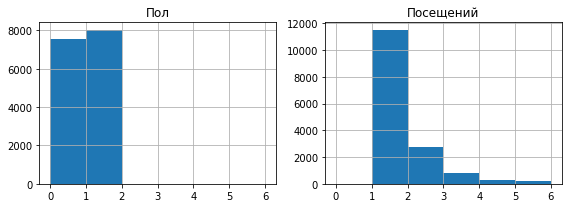

In [36]:
df3[['Пол','Посещений']].hist(figsize=(8, 3), bins=[0, 1, 2, 3, 4, 5, 6]);
plt.tight_layout()

In [37]:
list=['Пол', 'Посещений']
for i in list:
    print(df3[i].value_counts())
    print('\n')

1    8016
0    7561
Name: Пол, dtype: int64


1     11492
2      2741
3       794
4       282
5       107
6        67
7        41
9        13
8        13
10        6
11        5
13        4
12        2
21        2
14        2
15        2
20        1
28        1
18        1
17        1
Name: Посещений, dtype: int64




Text(0.5, 0, 'ARPU, руб.')

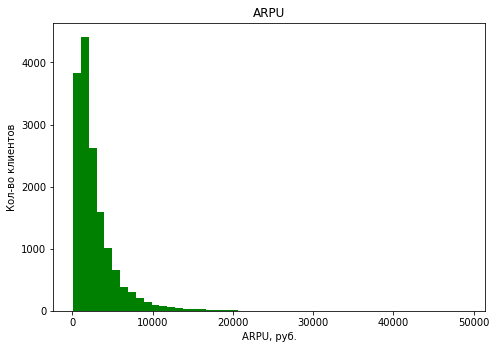

In [38]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df3['ARPU'], bins=50, color = 'green')
axes.set_title('ARPU')
axes.set_ylabel('Кол-во клиентов')
axes.set_xlabel('ARPU, руб.')

Text(0.5, 0, 'ARPU, руб.')

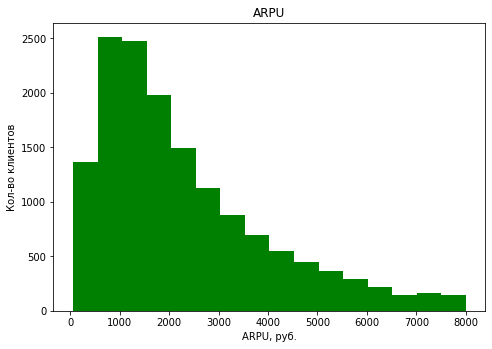

In [39]:
df4=df3[df3['ARPU']<8000]
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df4['ARPU'], bins=16, color = 'green')
axes.set_title('ARPU')
axes.set_ylabel('Кол-во клиентов')
axes.set_xlabel('ARPU, руб.')

Text(0.5, 0, 'ARPU, руб.')

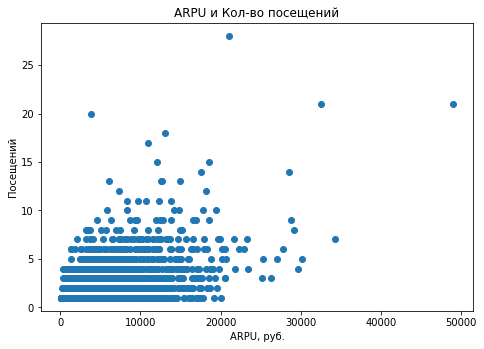

In [40]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=df3['ARPU'], y=df3['Посещений'], marker='o')
axes.set_title('ARPU и Кол-во посещений')
axes.set_ylabel('Посещений')
axes.set_xlabel('ARPU, руб.')

Text(0.5, 0, 'ARPU, руб.')

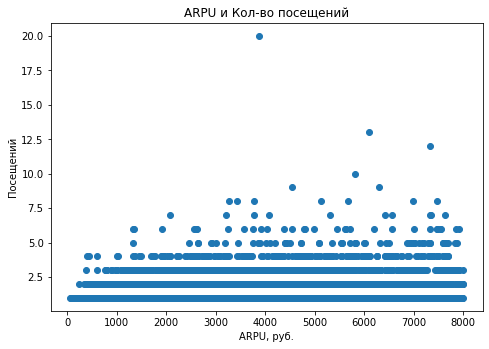

In [41]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=df4['ARPU'], y=df4['Посещений'], marker='o')
axes.set_title('ARPU и Кол-во посещений')
axes.set_ylabel('Посещений')
axes.set_xlabel('ARPU, руб.')

In [42]:
df3['ARPU'].median()

1889.0